# DAY 34

首先回顾下昨天的内容,我在训练开始和结束增加了time来查看运行时长

Epoch [100/20000], Loss: 1.1143
Epoch [200/20000], Loss: 1.0841
Epoch [300/20000], Loss: 1.0578
Epoch [400/20000], Loss: 1.0265
Epoch [500/20000], Loss: 0.9851
Epoch [600/20000], Loss: 0.9316
Epoch [700/20000], Loss: 0.8681
Epoch [800/20000], Loss: 0.7994
Epoch [900/20000], Loss: 0.7325
Epoch [1000/20000], Loss: 0.6736
Epoch [1100/20000], Loss: 0.6241
Epoch [1200/20000], Loss: 0.5835
Epoch [1300/20000], Loss: 0.5502
Epoch [1400/20000], Loss: 0.5225
Epoch [1500/20000], Loss: 0.4992
Epoch [1600/20000], Loss: 0.4789
Epoch [1700/20000], Loss: 0.4609
Epoch [1800/20000], Loss: 0.4447
Epoch [1900/20000], Loss: 0.4299
Epoch [2000/20000], Loss: 0.4160
Epoch [2100/20000], Loss: 0.4029
Epoch [2200/20000], Loss: 0.3906
Epoch [2300/20000], Loss: 0.3787
Epoch [2400/20000], Loss: 0.3674
Epoch [2500/20000], Loss: 0.3564
Epoch [2600/20000], Loss: 0.3458
Epoch [2700/20000], Loss: 0.3355
Epoch [2800/20000], Loss: 0.3254
Epoch [2900/20000], Loss: 0.3157
Epoch [3000/20000], Loss: 0.3062
Epoch [3100/20000],

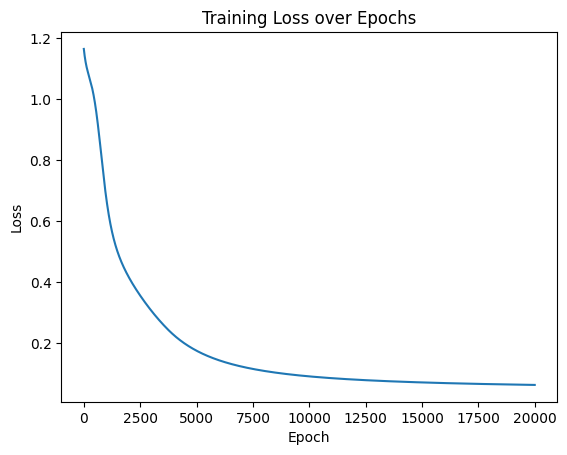

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# 仍然用4特征，3分类的鸢尾花数据集作为我们今天的数据集
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 打印下尺寸
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# 归一化数据，神经网络对于输入数据的尺寸敏感，归一化是最常见的处理方式
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #确保训练集和测试集是相同的缩放


# 将数据转换为 PyTorch 张量，因为 PyTorch 使用张量进行训练
# y_train和y_test是整数，所以需要转化为long类型，如果是float32，会输出1.0 0.0
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

class MLP(nn.Module): # 定义一个多层感知机（MLP）模型，继承父类nn.Module
    def __init__(self): # 初始化函数
        super(MLP, self).__init__() # 调用父类的初始化函数
 # 前三行是八股文，后面的是自定义的

        self.fc1 = nn.Linear(4, 10)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # 隐藏层到输出层
# 输出层不需要激活函数，因为后面会用到交叉熵函数cross_entropy，交叉熵函数内部有softmax函数，会把输出转化为概率

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 实例化模型
model = MLP()

# 分类问题使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 使用随机梯度下降优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# # 使用自适应学习率的化器
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 20000 # 训练的轮数

# 用于存储每个 epoch 的损失值
losses = []

import time
start_time = time.time() # 记录开始时间

for epoch in range(num_epochs): # range是从0开始，所以epoch是从0开始
    # 前向传播
    outputs = model.forward(X_train)   # 显式调用forward函数
    # outputs = model(X_train)  # 常见写法隐式调用forward函数，其实是用了model类的__call__方法
    loss = criterion(outputs, y_train) # output是模型预测值，y_train是真实标签

    # 反向传播和优化
    optimizer.zero_grad() #梯度清零，因为PyTorch会累积梯度，所以每次迭代需要清零，梯度累计是那种小的bitchsize模拟大的bitchsize
    loss.backward() # 反向传播计算梯度
    optimizer.step() # 更新参数

    # 记录损失值
    losses.append(loss.item())

    # 打印训练信息
    if (epoch + 1) % 100 == 0: # range是从0开始，所以epoch+1是从当前epoch开始，每100个epoch打印一次
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

time_all = time.time() - start_time # 计算训练时间
print(f'Training time: {time_all:.2f} seconds')
import matplotlib.pyplot as plt
# 可视化损失曲线
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

### CPU性能的查看

上述是在cpu的情况下训练，（即使安装了cuda，但是没有使用cuda），我们借这个机会简单介绍下cpu的性能差异。

In [72]:
# pip install wmi -i https://pypi.tuna.tsinghua.edu.cn/simple
# 这是Windows专用的库，Linux和MacOS不支持，其他系统自行询问大模型
# 我想查看一下CPU的型号和核心数
import wmi

c = wmi.WMI()
processors = c.Win32_Processor()

for processor in processors:
    print(f"CPU 型号: {processor.Name}")
    print(f"核心数: {processor.NumberOfCores}")
    print(f"线程数: {processor.NumberOfLogicalProcessors}")

CPU 型号: 12th Gen Intel(R) Core(TM) i9-12900KF
核心数: 16
线程数: 24


解读下我的cpu配置
- Intel 第 12 代酷睿（Alder Lake 架构，2021 年发布）
- K：支持超频（解锁倍频）
- F：无内置核显（需搭配独立显卡使用）
- 核心架构：
  - 性能核（P-Core）：8 核（支持超线程，共 16 线程），擅长单线程高性能任务（如游戏、视频剪辑）
  - 能效核（E-Core）：8 核（不支持超线程，共 8 线程），优化多线程能效比（如后台任务、虚拟机）。




判断 CPU 的好坏需要综合考虑硬件参数、性能表现、适用场景。

1. 看架构代际，新一代架构通常优化指令集、缓存设计和能效比。如Intel 第 13 代 i5-13600K 比第 12 代 i5-12600K 多核性能提升约 15%
2. 看制程工艺，制程越小，晶体管密度越高，能效比越好，如AMD Ryzen 7000 系列（5nm）比 Ryzen 5000 系列（7nm）能效比提升约 30%。
3. 看核心数：性能核负责高负载任务（如游戏、视频剪辑），单核性能强。能效核负责多任务后台处理（如下载、杀毒），功耗低。如游戏 / 办公：4-8 核足够，内容创作 / 编程：12 核以上更优。
4. 看线程数目
5. 看频率，高频适合单线程任务（如游戏、Office），低频多核适合多线程任务（如 3D 渲染）
6. 支持的指令集和扩展能力。

可以看到在我的电脑的配置下，cpu运行时长，是2.90s

昨天的训练是cpu的训练，今天介绍下gpu的训练。

## GPU训练
要让模型在 GPU 上训练，主要是将模型和数据迁移到 GPU 设备上。

在 PyTorch 里，.to(device) 方法的作用是把张量或者模型转移到指定的计算设备（像 CPU 或者 GPU）上。

- 对于张量（Tensor）：调用 .to(device) 之后，会返回一个在新设备上的新张量。
- 对于模型（nn.Module）：调用 .to(device) 会直接对模型进行修改，让其所有参数和缓冲区都移到新设备上。

在进行计算时，所有输入张量和模型必须处于同一个设备。要是它们不在同一设备上，就会引发运行时错误。并非所有 PyTorch 对象都有 .to(device) 方法，只有继承自 torch.nn.Module 的模型以及 torch.Tensor 对象才有此方法。

```
RuntimeError: Tensor for argument #1 'input' is on CPU, but expected it to be on GPU
```

这个常见错误就是输入张量和模型处于不同的设备。

如何衡量GPU的性能好坏呢？

以RTX 3090 Ti,  RTX 3080, RTX 3070 Ti, RTX 3070, RTX 4070等为例
- 通过“代”
前两位数字代表“代”: 40xx (第40代), 30xx (第30代), 20xx (第20代)。“代”通常指的是其底层的架构 (Architecture)。每一代新架构的发布，通常会带来工艺制程的进步和其他改进。也就是新一代架构的目标是在能效比和绝对性能上超越前一代同型号的产品。

- 通过级别
后面的数字代表“级别”，
  - xx90: 通常是该代的消费级旗舰或次旗舰，性能最强，显存最大 (如 RTX 4090, RTX 3090)。
  - xx80: 高端型号，性能强劲，显存较多 (如 RTX 4080, RTX 3080)。
  - xx70: 中高端，甜点级，性能和价格平衡较好 (如 RTX 4070, RTX 3070)。
  - xx60: 主流中端，性价比较高，适合入门或预算有限 (如 RTX 4060, RTX 3060)。
  - xx50: 入门级，深度学习能力有限。

- 通过后缀
Ti 通常是同型号的增强版，性能介于原型号和更高一级型号之间 (如 RTX 4070 Ti 强于 RTX 4070，小于4080)。

- 通过显存容量 VRAM （最重要！！）
他是GPU 自身的独立高速内存，用于存储模型参数、激活值、输入数据批次等。单位通常是 GB（例如 8GB, 12GB, 24GB, 48GB）。如果显存不足，可能无法加载模型，或者被迫使用很小的批量大小，从而影响训练速度和效果

1. 训练阶段：小批量梯度是对真实梯度的一个有噪声的估计。批量越小，梯度的方差越大（噪声越大）。显存小只能够使用小批量梯度。
2. 推理阶段：有些模型本身就非常庞大（例如大型语言模型、高分辨率图像的复杂 CNN 网络）。即使你将批量大小减到 1，模型参数本身占用的显存可能就已经超出了你的 GPU 显存上限。


In [73]:
import torch

# 检查CUDA是否可用
if torch.cuda.is_available():
    print("CUDA可用！")
    # 获取可用的CUDA设备数量
    device_count = torch.cuda.device_count()
    print(f"可用的CUDA设备数量: {device_count}")
    # 获取当前使用的CUDA设备索引
    current_device = torch.cuda.current_device()
    print(f"当前使用的CUDA设备索引: {current_device}")
    # 获取当前CUDA设备的名称
    device_name = torch.cuda.get_device_name(current_device)
    print(f"当前CUDA设备的名称: {device_name}")
    # 获取CUDA版本
    cuda_version = torch.version.cuda
    print(f"CUDA版本: {cuda_version}")
    # 查看cuDNN版本（如果可用）
    print("cuDNN版本:", torch.backends.cudnn.version())

else:
    print("CUDA不可用。")

CUDA可用！
可用的CUDA设备数量: 1
当前使用的CUDA设备索引: 0
当前CUDA设备的名称: NVIDIA GeForce RTX 3080 Ti
CUDA版本: 11.1
cuDNN版本: 8005


In [74]:
# 设置GPU设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

使用设备: cuda:0


In [75]:
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 归一化数据
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将数据转换为PyTorch张量并移至GPU
# 分类问题交叉熵损失要求标签为long类型
# 张量具有to(device)方法，可以将张量移动到指定的设备上
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [76]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 实例化模型并移至GPU
# MLP继承nn.Module类，所以也具有to(device)方法
model = MLP().to(device)

In [77]:
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 20000
losses = []

Epoch [100/20000], Loss: 1.0763
Epoch [200/20000], Loss: 1.0542
Epoch [300/20000], Loss: 1.0276
Epoch [400/20000], Loss: 0.9927
Epoch [500/20000], Loss: 0.9465
Epoch [600/20000], Loss: 0.8870
Epoch [700/20000], Loss: 0.8205
Epoch [800/20000], Loss: 0.7541
Epoch [900/20000], Loss: 0.6927
Epoch [1000/20000], Loss: 0.6391
Epoch [1100/20000], Loss: 0.5941
Epoch [1200/20000], Loss: 0.5566
Epoch [1300/20000], Loss: 0.5253
Epoch [1400/20000], Loss: 0.4984
Epoch [1500/20000], Loss: 0.4751
Epoch [1600/20000], Loss: 0.4545
Epoch [1700/20000], Loss: 0.4360
Epoch [1800/20000], Loss: 0.4189
Epoch [1900/20000], Loss: 0.4032
Epoch [2000/20000], Loss: 0.3884
Epoch [2100/20000], Loss: 0.3746
Epoch [2200/20000], Loss: 0.3614
Epoch [2300/20000], Loss: 0.3487
Epoch [2400/20000], Loss: 0.3367
Epoch [2500/20000], Loss: 0.3251
Epoch [2600/20000], Loss: 0.3140
Epoch [2700/20000], Loss: 0.3034
Epoch [2800/20000], Loss: 0.2933
Epoch [2900/20000], Loss: 0.2835
Epoch [3000/20000], Loss: 0.2742
Epoch [3100/20000],

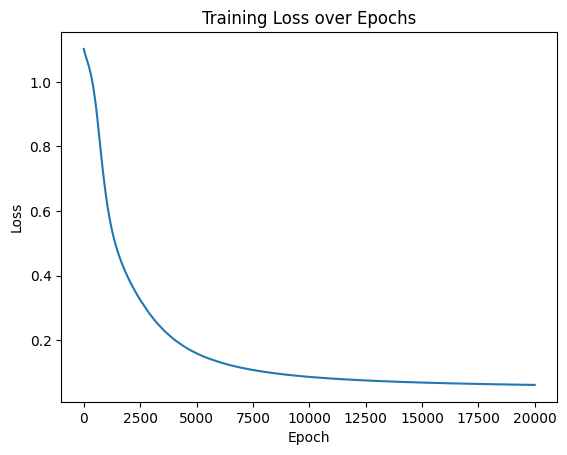

In [78]:
start_time = time.time()

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 记录损失值
    losses.append(loss.item())

    # 打印训练信息
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

time_all = time.time() - start_time
print(f'Training time: {time_all:.2f} seconds')

# 可视化损失曲线
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

你这时可能会好奇，不是说gpu比cpu快很多吗？怎么cpu跑了3s，gpu跑了11s。

你问AI，他会告诉你，对于非常小的数据集和简单的模型，CPU 通常会比 GPU 更快。实际上，这并非本质的原因。

这需要你进一步理解二者的区别，深度学习项目的运行时长往往很长，如果只停留在跑通的层面，那是不够的。

本质是因为GPU在计算的时候，相较于cpu多了3个时间上的开销
1. 数据传输开销 (CPU 内存 <-> GPU 显存)
2. 核心启动开销 (GPU 核心启动时间)
3. 性能浪费：计算量和数据批次

下面详细介绍下

### 数据传输开销 (CPU 内存 <-> GPU 显存)

- 在 GPU 进行任何计算之前，数据（输入张量 X_train、y_train，模型参数）需要从计算机的主内存 (RAM) 复制到 GPU 专用的显存 (VRAM) 中。
- 当结果传回 CPU 时（例如，使用 loss.item() 获取损失值用于打印或记录，或者获取最终预测结果），数据也需要从 GPU 显存复制回 CPU 内存。
- 对于少量数据和非常快速的计算任务，这个传输时间可能比 GPU 通过并行计算节省下来的时间还要长。

在上述代码中，循环里的 loss.item() 操作会在每个 epoch 都进行一次从 GPU 到 CPU 的数据同步和传输，以便获取标量损失值。对于20000个epoch来说，这会累积不少的传输开销。

### 核心启动开销 (GPU 核心启动时间)
- GPU 执行的每个操作（例如，一个线性层的前向传播、一个激活函数）都涉及到在 GPU 上启动一个“核心”(kernel)——一个在 GPU 众多计算单元上运行的小程序。
- 启动每个核心都有一个小的、固定的开销。
- 如果核心内的实际计算量非常小（本项目的小型网络和鸢尾花数据），这个启动开销在总时间中的占比就会比较大。相比之下，CPU 执行这些小操作的“调度”开销通常更低。

### 性能浪费：计算量和数据批次
- 这个数据量太少，gpu的很多计算单元都没有被用到，即使用了全批次也没有用到的全部计算单元。


综上，数据传输和各种固定开销的总和，超过了 GPU 在这点计算量上通过并行处理所能节省的时间，导致了 GPU 比 CPU 慢的现象。
- CPU (12th Gen Intel Core i9-12900KF): 对于这种小任务，CPU 的单核性能强劲，且没有显著的数据传输到“另一块芯片”的开销。它可以非常迅速地完成计算。
- GPU (NVIDIA GeForce RTX 3080 Ti):需要花费时间将数据和模型从 CPU 内存移动到 GPU 显存。
- 每次在 GPU 上执行运算（如 model(X_train)、loss.backward()) 都有核心启动的固定开销。
- loss.item() 在每个 epoch 都需要将结果从 GPU 传回 CPU，这在总共 20000 个 epoch 中会累积。
- GPU 强大的并行计算能力在这种小任务上完全没有用武之地。

这些特性导致GPU在处理鸢尾花分类这种“玩具级别”的问题时，它的优势无法体现，反而会因为上述开销显得“笨重”。

那么什么时候 GPU 会发挥巨大优势？

- 大型数据集： 例如，图像数据集成千上万张图片，每张图片维度很高。
- 大型模型： 例如，深度卷积网络 (CNNs like ResNet, VGG) 或 Transformer 模型，它们有数百万甚至数十亿的参数，计算量巨大。
- 合适的批处理大小： 能够充分利用 GPU 并行性的 batch size，不至于还有剩余的计算量没有被 GPU 处理。
- 复杂的、可并行的运算： 大量的矩阵乘法、卷积等。


针对上面反应的3个问题，能够优化的只有数据传输时间，针对性解决即可，很容易想到2个思路：
1. 直接不打印训练过程的loss了，但是这样会没办法记录最后的可视化图片，只能肉眼观察loss数值变化。
2. 每隔200个epoch保存一下loss，不需要20000个epoch每次都打印，

下面先尝试第一个思路：

In [79]:
# 知道了哪里耗时，针对性优化一下
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# 仍然用4特征，3分类的鸢尾花数据集作为我们今天的数据集
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 打印下尺寸
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# 归一化数据，神经网络对于输入数据的尺寸敏感，归一化是最常见的处理方式
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #确保训练集和测试集是相同的缩放


# 将数据转换为 PyTorch 张量，因为 PyTorch 使用张量进行训练
# y_train和y_test是整数，所以需要转化为long类型，如果是float32，会输出1.0 0.0
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

class MLP(nn.Module): # 定义一个多层感知机（MLP）模型，继承父类nn.Module
    def __init__(self): # 初始化函数
        super(MLP, self).__init__() # 调用父类的初始化函数
 # 前三行是八股文，后面的是自定义的

        self.fc1 = nn.Linear(4, 10)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # 隐藏层到输出层
# 输出层不需要激活函数，因为后面会用到交叉熵函数cross_entropy，交叉熵函数内部有softmax函数，会把输出转化为概率

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 实例化模型
model = MLP()

# 分类问题使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 使用随机梯度下降优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# # 使用自适应学习率的化器
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 20000 # 训练的轮数

# 用于存储每个 epoch 的损失值
losses = []

import time
start_time = time.time() # 记录开始时间

for epoch in range(num_epochs): # range是从0开始，所以epoch是从0开始
    # 前向传播
    outputs = model.forward(X_train)   # 显式调用forward函数
    # outputs = model(X_train)  # 常见写法隐式调用forward函数，其实是用了model类的__call__方法
    loss = criterion(outputs, y_train) # output是模型预测值，y_train是真实标签

    # 反向传播和优化
    optimizer.zero_grad() #梯度清零，因为PyTorch会累积梯度，所以每次迭代需要清零，梯度累计是那种小的bitchsize模拟大的bitchsize
    loss.backward() # 反向传播计算梯度
    optimizer.step() # 更新参数

    # 记录损失值
    # losses.append(loss.item())

    # 打印训练信息
    if (epoch + 1) % 100 == 0: # range是从0开始，所以epoch+1是从当前epoch开始，每100个epoch打印一次
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

time_all = time.time() - start_time # 计算训练时间
print(f'Training time: {time_all:.2f} seconds')

Epoch [100/20000], Loss: 1.0545
Epoch [200/20000], Loss: 1.0159
Epoch [300/20000], Loss: 0.9747
Epoch [400/20000], Loss: 0.9242
Epoch [500/20000], Loss: 0.8653
Epoch [600/20000], Loss: 0.8016
Epoch [700/20000], Loss: 0.7381
Epoch [800/20000], Loss: 0.6791
Epoch [900/20000], Loss: 0.6273
Epoch [1000/20000], Loss: 0.5832
Epoch [1100/20000], Loss: 0.5461
Epoch [1200/20000], Loss: 0.5148
Epoch [1300/20000], Loss: 0.4880
Epoch [1400/20000], Loss: 0.4648
Epoch [1500/20000], Loss: 0.4443
Epoch [1600/20000], Loss: 0.4258
Epoch [1700/20000], Loss: 0.4090
Epoch [1800/20000], Loss: 0.3934
Epoch [1900/20000], Loss: 0.3788
Epoch [2000/20000], Loss: 0.3652
Epoch [2100/20000], Loss: 0.3522
Epoch [2200/20000], Loss: 0.3399
Epoch [2300/20000], Loss: 0.3282
Epoch [2400/20000], Loss: 0.3170
Epoch [2500/20000], Loss: 0.3063
Epoch [2600/20000], Loss: 0.2960
Epoch [2700/20000], Loss: 0.2863
Epoch [2800/20000], Loss: 0.2770
Epoch [2900/20000], Loss: 0.2681
Epoch [3000/20000], Loss: 0.2596
Epoch [3100/20000],

优化后发现确实效果好，近乎和用cpu训练的时长差不多。所以可以理解为数据从gpu到cpu的传输占用了大量时间。

下面尝试下第二个思路：

使用设备: cuda:0
Epoch [100/20000], Loss: 1.0107
Epoch [200/20000], Loss: 0.9498
Epoch [200/20000], Loss: 0.9498
Epoch [300/20000], Loss: 0.8876
Epoch [400/20000], Loss: 0.8256
Epoch [400/20000], Loss: 0.8256
Epoch [500/20000], Loss: 0.7634
Epoch [600/20000], Loss: 0.7044
Epoch [600/20000], Loss: 0.7044
Epoch [700/20000], Loss: 0.6521
Epoch [800/20000], Loss: 0.6073
Epoch [800/20000], Loss: 0.6073
Epoch [900/20000], Loss: 0.5698
Epoch [1000/20000], Loss: 0.5385
Epoch [1000/20000], Loss: 0.5385
Epoch [1100/20000], Loss: 0.5121
Epoch [1200/20000], Loss: 0.4896
Epoch [1200/20000], Loss: 0.4896
Epoch [1300/20000], Loss: 0.4701
Epoch [1400/20000], Loss: 0.4528
Epoch [1400/20000], Loss: 0.4528
Epoch [1500/20000], Loss: 0.4373
Epoch [1600/20000], Loss: 0.4231
Epoch [1600/20000], Loss: 0.4231
Epoch [1700/20000], Loss: 0.4100
Epoch [1800/20000], Loss: 0.3977
Epoch [1800/20000], Loss: 0.3977
Epoch [1900/20000], Loss: 0.3861
Epoch [2000/20000], Loss: 0.3750
Epoch [2000/20000], Loss: 0.3750
Epoch [210

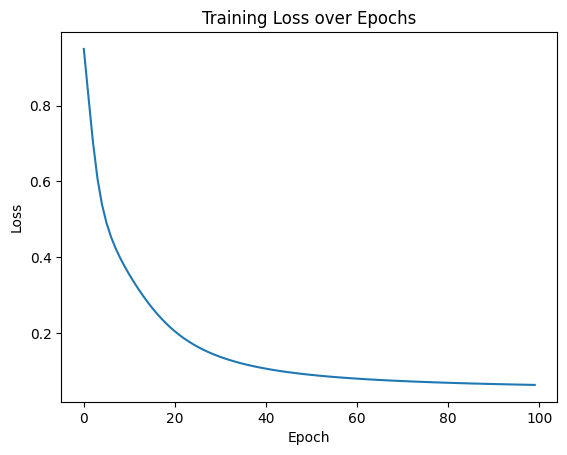

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

# 设置GPU设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 归一化数据
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将数据转换为PyTorch张量并移至GPU
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # 隐藏层到输出层

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 实例化模型并移至GPU
model = MLP().to(device)

# 分类问题使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 使用随机梯度下降优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 20000  # 训练的轮数

# 用于存储每100个epoch的损失值和对应的epoch数
losses = []

start_time = time.time()  # 记录开始时间

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)  # 隐式调用forward函数
    loss = criterion(outputs, y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 记录损失值
    if (epoch + 1) % 200 == 0:
        losses.append(loss.item()) # item()方法返回一个Python数值，loss是一个标量张量
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # 打印训练信息
    if (epoch + 1) % 100 == 0: # range是从0开始，所以epoch+1是从当前epoch开始，每100个epoch打印一次
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

time_all = time.time() - start_time  # 计算训练时间
print(f'Training time: {time_all:.2f} seconds')


# 可视化损失曲线
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

这里我们定义剩余时长 = 总时长-必须的计算时长3s，可以多做几次实验，来对比下记录次数和剩余时长的分布关系，很容易以为这二者是成正比的

下表为我在我的本地电脑上的测试结果，总epoch = 20000

| 记录间隔（轮） | 记录次数（次） | 剩余时长（秒） |
|----------------|----------------|----------------|
| 100            | 200            | 10.43          |
| 200            | 100            | 10.02          |
| 1000           | 20             | 10.12          |
| 2000           | 10             | 9.74           |


可以发现，记录次数和剩余时长之间并无明显的线性关系。思考下为什么？

我目前的理解是loss.item()是一个同步操作，gou需要等待cpu完成才能开启下次运算。但是仍然无法解释为为什么剩余时长和记录次数之间没有线性关系。

## __call__方法

在 Python 中，__call__ 方法是一个特殊的魔术方法（双下划线方法），它允许类的实例像函数一样被调用。这种特性使得对象可以表现得像函数，同时保留对象的内部状态。


In [ ]:
# 我们来看下昨天代码中你的定义函数的部分
class MLP(nn.Module): # 定义一个多层感知机（MLP）模型，继承父类nn.Module
    def __init__(self): # 初始化函数
        super(MLP, self).__init__() # 调用父类的初始化函数
 # 前三行是八股文，后面的是自定义的

        self.fc1 = nn.Linear(4, 10)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # 隐藏层到输出层
# 输出层不需要激活函数，因为后面会用到交叉熵函数cross_entropy，交叉熵函数内部有softmax函数，会把输出转化为概率

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

可以注意到，self.fc1 = nn.Linear(4, 10)  此时，是实例化了一个nn.Linear(4, 10)对象，并把这个对象赋值给了MLP的初始化函数中的self.fc1变量。

那为什么下面的前向传播中却可以out = self.fc1(x)  呢？，self.fc1是一个实例化的对象，为什么具备了函数一样的用法，这是因为nn.Linear继承了nn.Module类，nn.Module类中定义了__call__方法。（可以ctrl不断进入来查看）

在 Python 中，任何定义了 __call__ 方法的类，其实例都可以像函数一样被调用。

当调用 self.fc1(x) 时，实际上执行的是：
- self.fc1.__call__(x)（Python 的隐式调用）
- 而 nn.Module 的 __call__ 方法会调用子类的 forward 方法（即 self.fc1.forward(x)）。这个方法就是个前向计算方法。

relu是torch.relu()这个函数为了保持写法一致，又封装成了nn.ReLU()这个类。来保证接口的一致性


PyTorch 官方强烈建议使用 self.fc1(x)，因为它会触发完整的前向传播流程（包括钩子函数）这是 PyTorch 的核心设计模式，几乎所有组件（如 nn.Conv2d、nn.ReLU、甚至整个模型）都可以这样调用。

我们来介绍一下call方法是什么

In [ ]:
# 不带参数的call方法
class Counter:
    def __init__(self):
        self.count = 0
    
    def __call__(self):
        self.count += 1
        return self.count

# 使用示例
counter = Counter()
print(counter())  # 输出: 1
print(counter())  # 输出: 2
print(counter.count)  # 输出: 2

1
2
2


类名后跟()，表示创建类的实例（对象），仅在第一次创建对象时发生。

call方法无参数的情况下，在实例化之后，每次调用实例时触发 __call__ 方法



In [99]:
# 带参数的call方法
class Adder:
    def __call__(self, a, b):
        print("唱跳篮球rap")
        return a + b

adder = Adder()
print(adder(3, 5))  # 输出: 8

唱跳篮球rap
8
